In [211]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.target[[10, 50, 85]]
list(cancer.target_names)
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df['target_names'] = pd.Categorical.from_codes(cancer.target, cancer.target_names)

In [36]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [119]:
from sklearn.model_selection import train_test_split
data = df.to_numpy()
X, y = data[:,0:ncol-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
X_train

array([[-0.35062921,  0.03857312, -0.37539381, ..., -0.73704916,
         0.68771639, -0.3562927 ],
       [ 1.97465015,  1.63274249,  2.07415117, ...,  2.63927492,
         1.97432258,  2.43905789],
       [ 0.24342026,  0.08846177,  0.14813879, ..., -0.83097675,
        -0.40548912, -1.25978505],
       ...,
       [-0.46661029,  0.11794144, -0.46679779, ..., -0.55202672,
        -0.34156855, -0.34041314],
       [-1.55937844, -0.17458751, -1.54161063, ..., -1.68884872,
         0.40744931, -0.1476681 ],
       [-0.16958556, -0.10882519, -0.15382078, ...,  0.47744947,
        -0.37270934, -0.38312368]])

In [121]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)


Eigenvalues 
 [1.36731186e+01 5.24345457e+00 2.98616822e+00 2.02781347e+00
 1.59457182e+00 1.20052371e+00 7.18206198e-01 4.83717557e-01
 4.49825008e-01 3.24270826e-01 2.87328307e-01 2.50375271e-01
 1.97704091e-01 1.43198405e-01 9.33618371e-02 8.45979209e-02
 6.22979471e-02 6.00167889e-02 4.56439623e-02 1.09941257e-04
 6.70242896e-04 1.63473205e-03 6.26610286e-03 7.71736076e-03
 1.10145205e-02 1.67655323e-02 2.14864577e-02 2.61530744e-02
 2.90734572e-02 2.84808465e-02]


In [122]:
eigen_vals.shape, eigen_vecs.shape

((30,), (30, 30))

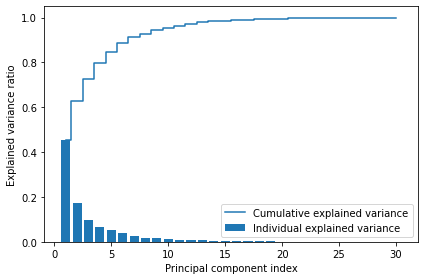

In [123]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 31), var_exp, align='center',label='Individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [218]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [131]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.21879843  0.23764319]
 [ 0.09818746  0.03904195]
 [ 0.2274425   0.2173187 ]
 [ 0.22082837  0.23501692]
 [ 0.15503953 -0.1855439 ]
 [ 0.24141471 -0.14423022]
 [ 0.25864725 -0.04571397]
 [ 0.25896496  0.0422654 ]
 [ 0.13379101 -0.19311174]
 [ 0.07151835 -0.37752757]
 [ 0.2001303   0.1200457 ]
 [ 0.02738134 -0.08950311]
 [ 0.20586003  0.10323214]
 [ 0.19777132  0.15868211]
 [ 0.02241951 -0.19403372]
 [ 0.17819002 -0.22640581]
 [ 0.16727064 -0.18245491]
 [ 0.1866018  -0.09922225]
 [ 0.05286232 -0.1617829 ]
 [ 0.09959407 -0.28030992]
 [ 0.22834115  0.21797088]
 [ 0.09996262  0.01627472]
 [ 0.23656006  0.19668063]
 [ 0.22717279  0.21598958]
 [ 0.12967832 -0.18758475]
 [ 0.20885304 -0.14655328]
 [ 0.22602566 -0.10233925]
 [ 0.24654765  0.00702059]
 [ 0.11982791 -0.14733328]
 [ 0.12754261 -0.28906875]]


In [132]:
X_train_std[0].dot(w)

array([-0.0012446469063521204, 1.674767011415427], dtype=object)

In [184]:
X_train_pca = X_train_std.dot(w).astype('float')

In [185]:
X_test_pca = X_test_std.dot(w).astype('float')

In [198]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
lr.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

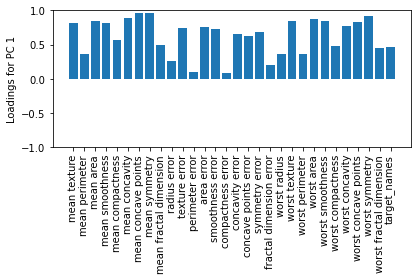

In [200]:
loadings = eigen_vecs * np.sqrt(eigen_vals)
fig, ax = plt.subplots()
ax.bar(range(30), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(30))
ax.set_xticklabels(df.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   mean radius              569 non-null    float64 
 1   mean texture             569 non-null    float64 
 2   mean perimeter           569 non-null    float64 
 3   mean area                569 non-null    float64 
 4   mean smoothness          569 non-null    float64 
 5   mean compactness         569 non-null    float64 
 6   mean concavity           569 non-null    float64 
 7   mean concave points      569 non-null    float64 
 8   mean symmetry            569 non-null    float64 
 9   mean fractal dimension   569 non-null    float64 
 10  radius error             569 non-null    float64 
 11  texture error            569 non-null    float64 
 12  perimeter error          569 non-null    float64 
 13  area error               569 non-null    float64 
 14  smoothness

In [201]:
lr.coef_

array([[2.57810074, 2.17896581]])

In [202]:
lr.intercept_

array([-5.76633691])

In [203]:
previsoes = lr.predict(X_test_pca)
previsoes

array(['benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'malignant', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign

In [205]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.9064327485380117

0.9064327485380117

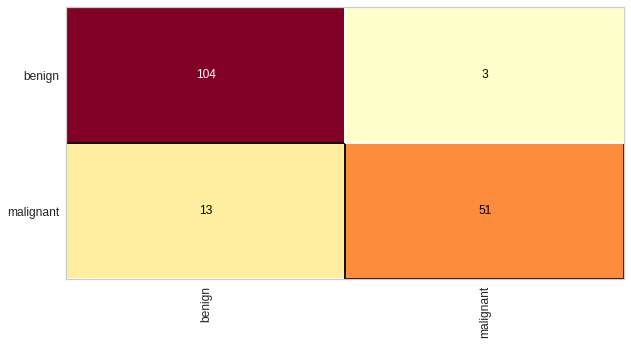

In [209]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize=(10,5))
cm = ConfusionMatrix(lr)
cm.fit(X_train_pca, y_train)
cm.score(X_test_pca, y_test)

In [210]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

      benign       0.89      0.97      0.93       107
   malignant       0.94      0.80      0.86        64

    accuracy                           0.91       171
   macro avg       0.92      0.88      0.90       171
weighted avg       0.91      0.91      0.90       171

